In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/society-ipd.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
peak_df = pd.DataFrame(
    [
        ["train", population, lb, i + 1, p]
        for (population, lb, t), peaks in data["train_peaks"].items()
        for peak in peaks
        for i, p in enumerate(peak)
    ]
    + [
        ["test", population, lb, i + 1, p]
        for (population, lb, t), peaks in data["test_peaks"].items()
        for peak in peaks
        for i, p in enumerate(peak)
    ],
    columns=["phase", "population", "lookback", "peak_index", "weight"],
)

peak_df

,phase,population,lookback,peak_index,weight
0,train,16,1,1,0.896
1,train,16,1,2,0.483
2,train,16,1,1,0.884
3,train,16,1,2,0.456
4,train,16,1,1,0.883
...,...,...,...,...,...
3323,test,512,5,4,0.667
3324,test,512,5,1,1.000
3325,test,512,5,2,0.819
3326,test,512,5,3,0.050


(0.0, 1.0)

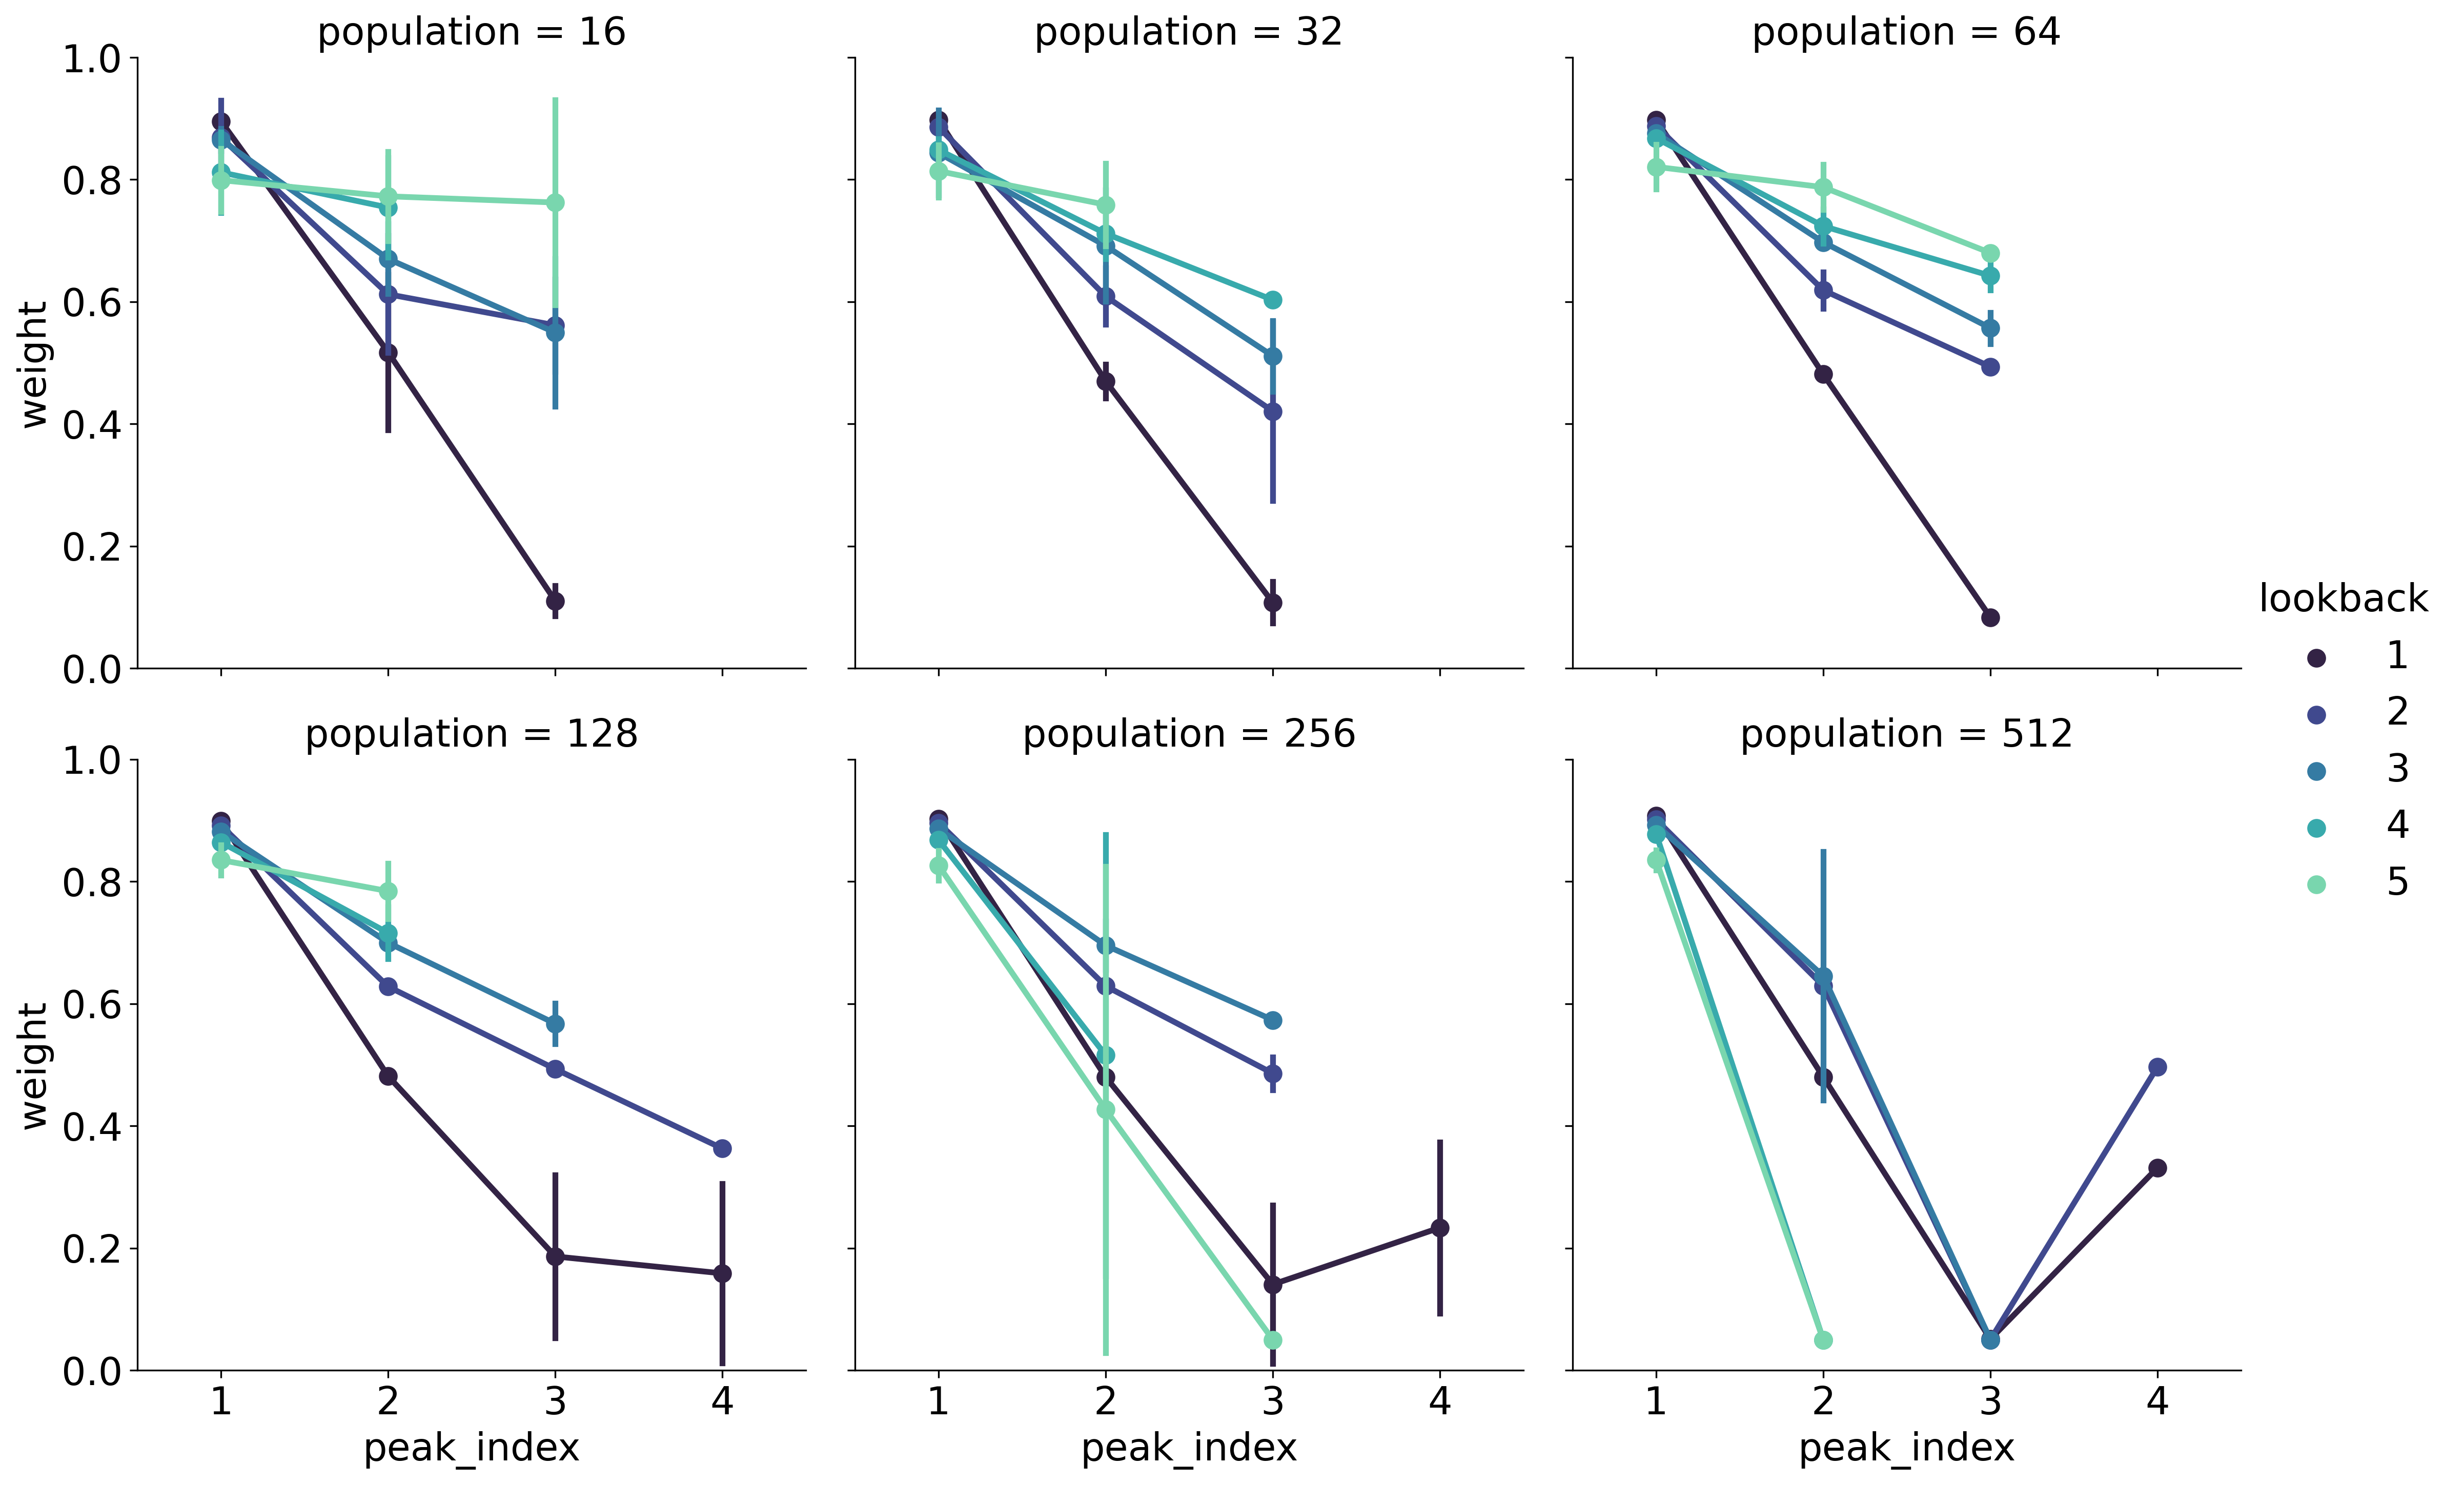

In [8]:
sns.catplot(
    data=peak_df[peak_df["phase"] == "train"],
    x="peak_index",
    y="weight",
    hue="lookback",
    col="population",
    palette="mako",
    col_wrap=3,
    kind="point",
    errorbar="sd",
)

plt.ylim(0.0, 1.0)

(0.0, 1.0)

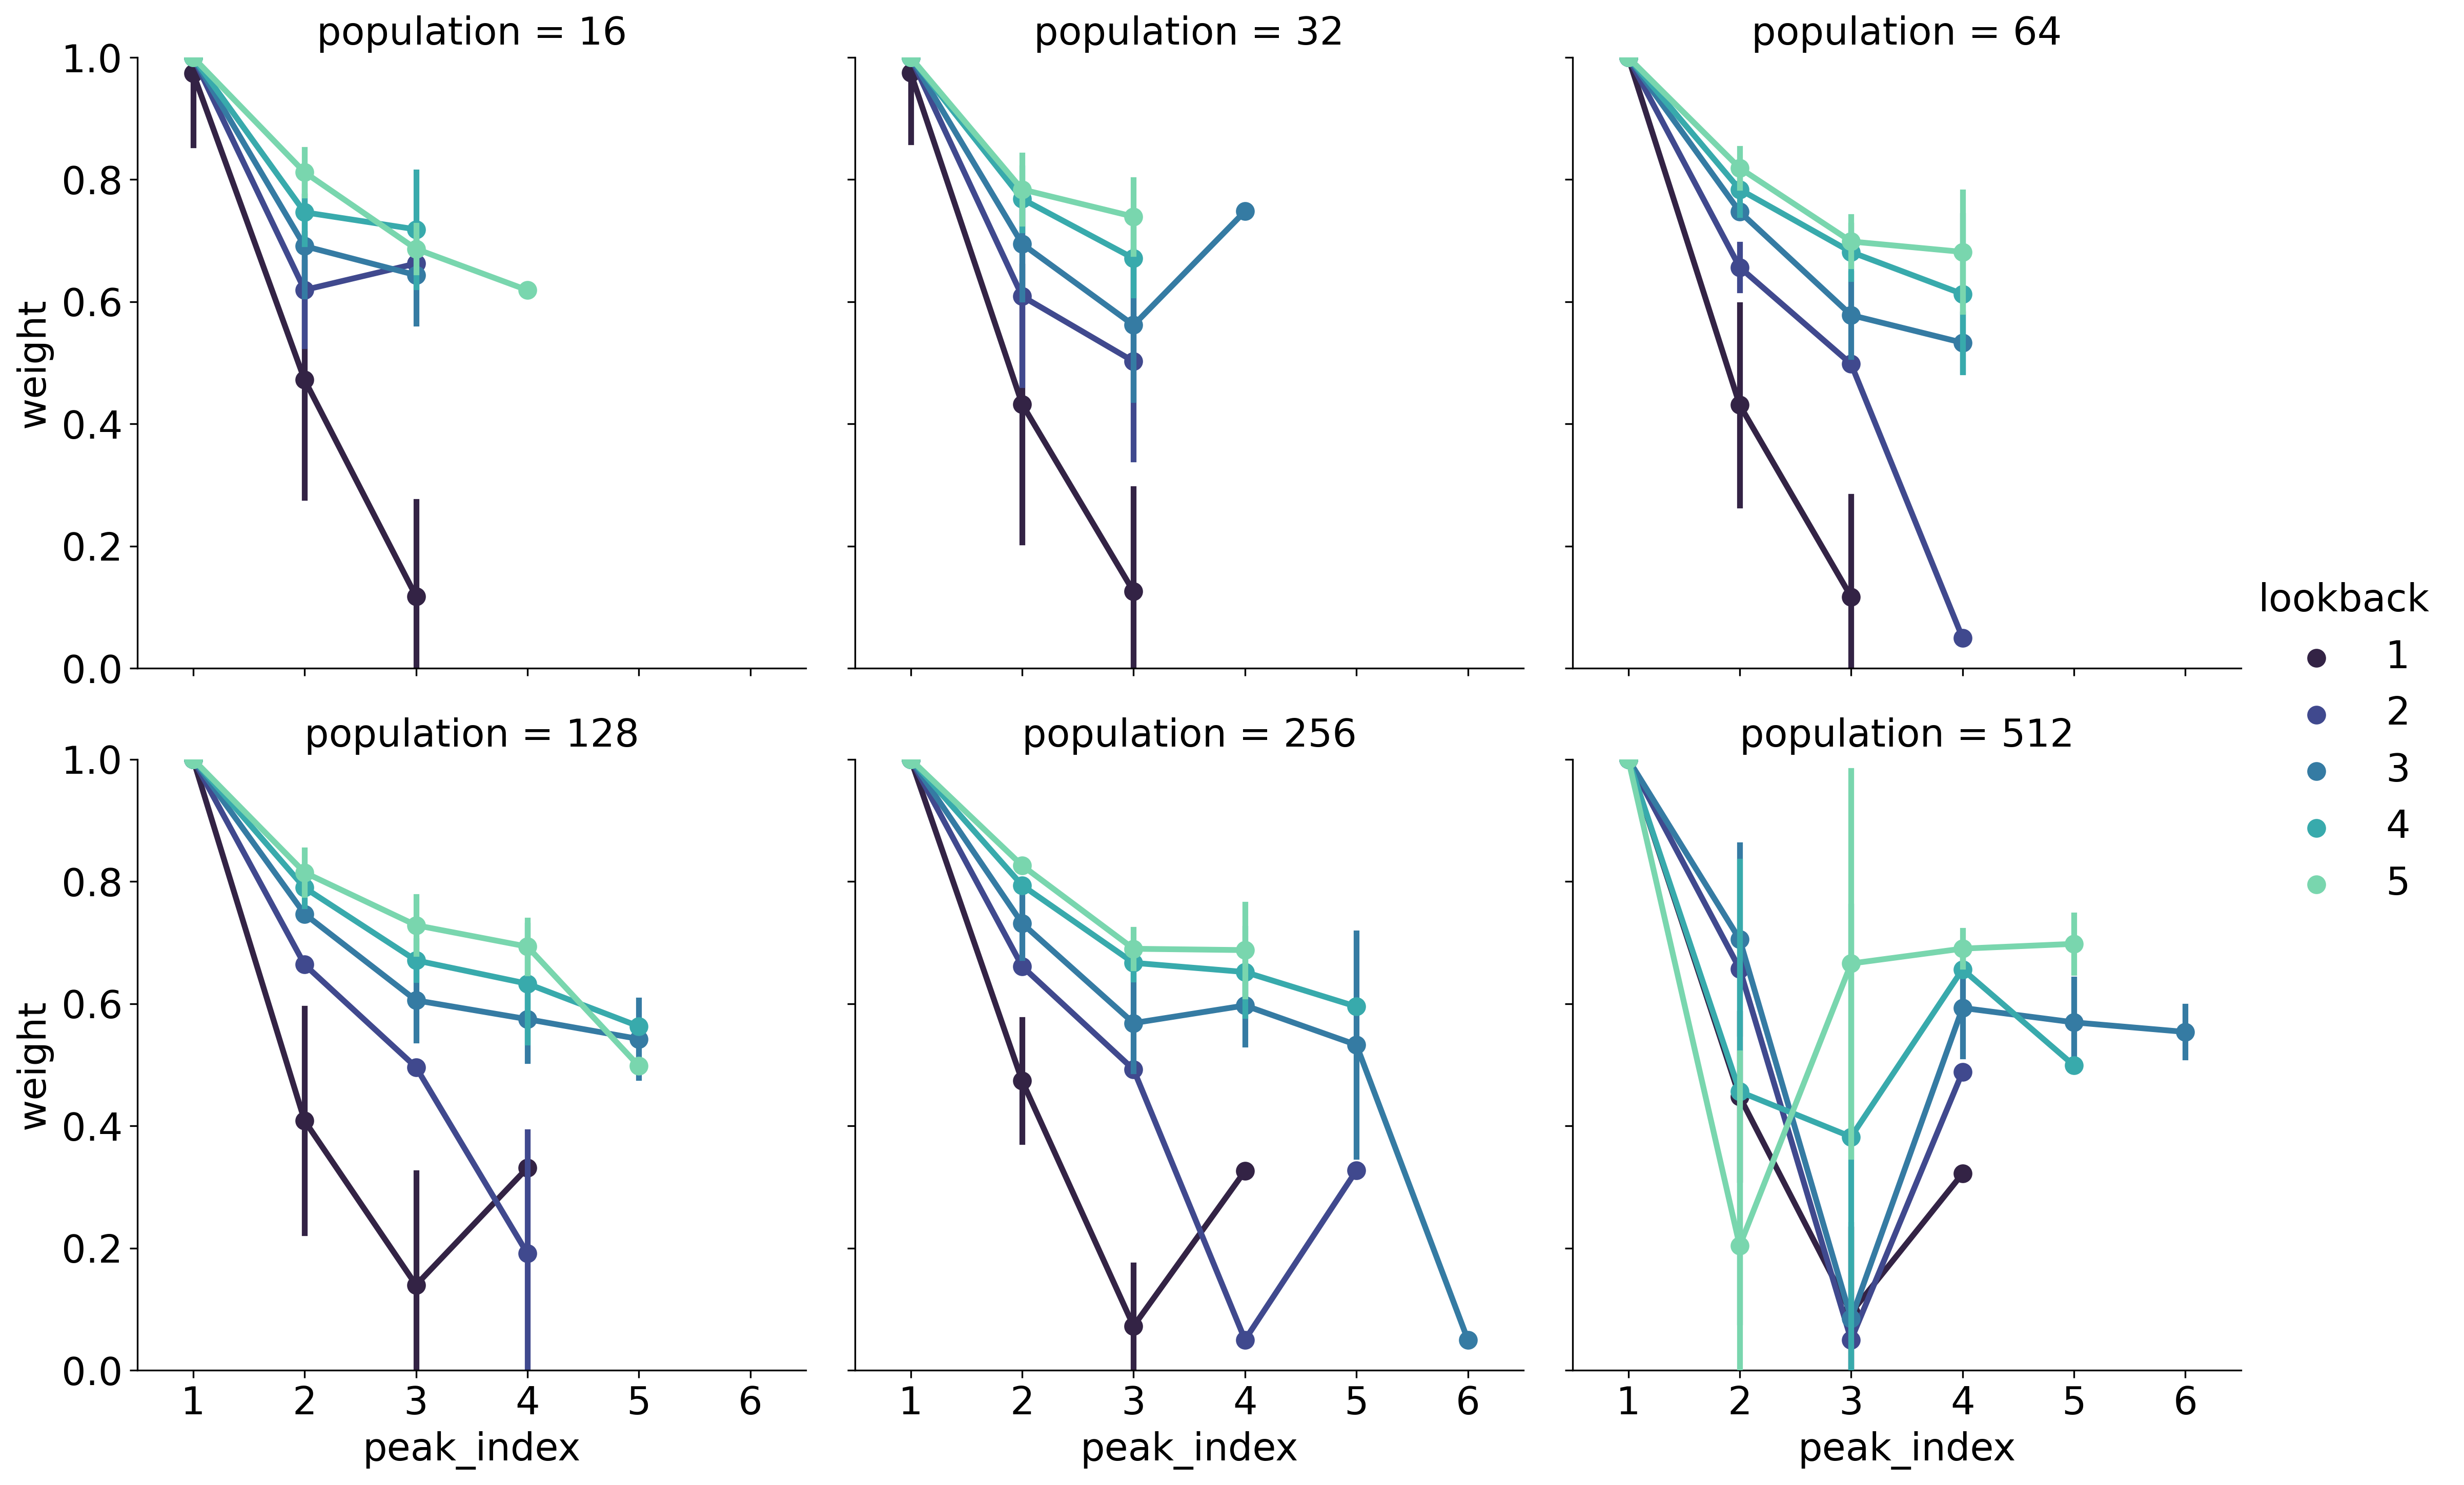

In [9]:
sns.catplot(
    data=peak_df[peak_df["phase"] == "test"],
    x="peak_index",
    y="weight",
    hue="lookback",
    col="population",
    palette="mako",
    col_wrap=3,
    kind="point",
    errorbar="sd",
)

plt.ylim(0.0, 1.0)

In [12]:
peak_df.groupby(["phase", "population", "lookback", "peak_index"]).agg(
    {"weight": ["mean", "std", "count"]}
)  # .to_csv("analysis/ipd-peaks.csv")

weight                    
                                          mean           std count
phase population lookback peak_index                              
test  16         1        1           0.973800  1.171700e-01    20
                          2           0.472111  1.926606e-01    18
                          3           0.117846  1.553098e-01    13
                 2        1           1.000000  4.912526e-16    20
                          2           0.619389  9.196683e-02    18
...                                        ...           ...   ...
train 512        3        3           0.050000  0.000000e+00    18
                 4        1           0.877850  3.183427e-03    20
                          2           0.050000  0.000000e+00    20
                 5        1           0.835150  1.625221e-02    20
                          2           0.050000  0.000000e+00    20

[210 rows x 3 columns]

In [13]:
agg_df = (
    peak_df[peak_df["peak_index"] == 1]
    .groupby(["phase", "population", "lookback"])
    .agg({"weight": ["mean", "std", "count"]})
)

agg_df

weight                    
                              mean           std count
phase population lookback                             
test  16         1         0.97380  1.171700e-01    20
                 2         1.00000  4.912526e-16    20
                 3         1.00000  3.529263e-16    20
                 4         1.00000  3.056432e-16    20
                 5         1.00000  5.342687e-16    20
      32         1         0.97470  1.131450e-01    20
                 2         1.00000  0.000000e+00    20
                 3         1.00000  0.000000e+00    20
                 4         1.00000  0.000000e+00    20
                 5         1.00000  0.000000e+00    20
      64         1         1.00000  0.000000e+00    20
                 2         1.00000  0.000000e+00    20
                 3         1.00000  0.000000e+00    20
                 4         1.00000  0.000000e+00    20
                 5         1.00000  0.000000e+00    20
      128        1         1.00000  0.000000e+00    20
                 2         1.00000  0.000000e+00    20
                 3         1.00000  0.000000e+00    20
                 4         1.00000  0.000000e+00    20
                 5         1.00000  0.000000e+00    20
      256        1         1.00000  0.000000e+00    20
                 2         1.00000  0.000000e+00    20
                 3         1.00000  0.000000e+00    20
                 4         1.00000  0.000000e+00    20
                 5         1.00000  0.000000e+00    20
      512        1         1.00000  0.000000e+00    20
                 2         1.00000  0.000000e+00    20
                 3         1.00000  0.000000e+00    20
                 4         1.00000  0.000000e+00    20
                 5         1.00000  0.000000e+00    20
train 16         1         0.89540  7.264912e-03    20
                 2         0.86885  6.080190e-02    20
                 3         0.86525  1.791464e-02    20
                 4         0.81185  6.583974e-02    20
                 5         0.79905  5.142749e-02    20
      32         1         0.89750  3.332456e-03    20
                 2         0.88570  6.061961e-03    20
                 3         0.84365  6.960964e-02    20
                 4         0.84865  1.767626e-02    20
                 5         0.81395  4.273354e-02    20
      64         1         0.89785  2.641272e-03    20
                 2         0.88800  4.267379e-03    20
                 3         0.87605  6.533114e-03    20
                 4         0.86775  9.651152e-03    20
                 5         0.82085  3.652292e-02    20
      128        1         0.89915  1.136708e-03    20
                 2         0.89175  3.006572e-03    20
                 3         0.88195  4.628004e-03    20
                 4         0.86435  5.806303e-03    20
                 5         0.83515  2.487077e-02    20
      256        1         0.90255  6.863327e-04    20
                 2         0.89610  1.518309e-03    20
                 3         0.88635  3.422449e-03    20
                 4         0.86800  5.794734e-03    20
                 5         0.82640  2.417132e-02    20
      512        1         0.90760  7.539370e-04    20
                 2         0.90140  1.353358e-03    20
                 3         0.89290  2.074913e-03    20
                 4         0.87785  3.183427e-03    20
                 5         0.83515  1.625221e-02    20

In [26]:
agg_df2 = agg_df.reset_index()

agg_df3 = agg_df2.pivot(["phase", "population"], columns="lookback").reset_index()

agg_df3

C:\Users\jerem\AppData\Local\Temp/ipykernel_5956/2019636657.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  agg_df3 = agg_df2.pivot(["phase", "population"], columns="lookback").reset_index()


phase population   weight                                      \
                               mean                                       
lookback                          1        2        3        4        5   
0          test         16  0.97380  1.00000  1.00000  1.00000  1.00000   
1          test         32  0.97470  1.00000  1.00000  1.00000  1.00000   
2          test         64  1.00000  1.00000  1.00000  1.00000  1.00000   
3          test        128  1.00000  1.00000  1.00000  1.00000  1.00000   
4          test        256  1.00000  1.00000  1.00000  1.00000  1.00000   
5          test        512  1.00000  1.00000  1.00000  1.00000  1.00000   
6         train         16  0.89540  0.86885  0.86525  0.81185  0.79905   
7         train         32  0.89750  0.88570  0.84365  0.84865  0.81395   
8         train         64  0.89785  0.88800  0.87605  0.86775  0.82085   
9         train        128  0.89915  0.89175  0.88195  0.86435  0.83515   
10        train        256  0.90255  0.89610  0.88635  0.86800  0.82640   
11        train        512  0.90760  0.90140  0.89290  0.87785  0.83515   

                                                                            \
               std                                                           
lookback         1             2             3             4             5   
0         0.117170  4.912526e-16  3.529263e-16  3.056432e-16  5.342687e-16   
1         0.113145  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
5         0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6         0.007265  6.080190e-02  1.791464e-02  6.583974e-02  5.142749e-02   
7         0.003332  6.061961e-03  6.960964e-02  1.767626e-02  4.273354e-02   
8         0.002641  4.267379e-03  6.533114e-03  9.651152e-03  3.652292e-02   
9         0.001137  3.006572e-03  4.628004e-03  5.806303e-03  2.487077e-02   
10        0.000686  1.518309e-03  3.422449e-03  5.794734e-03  2.417132e-02   
11        0.000754  1.353358e-03  2.074913e-03  3.183427e-03  1.625221e-02   

                                
         count                  
lookback     1   2   3   4   5  
0           20  20  20  20  20  
1           20  20  20  20  20  
2           20  20  20  20  20  
3           20  20  20  20  20  
4           20  20  20  20  20  
5           20  20  20  20  20  
6           20  20  20  20  20  
7           20  20  20  20  20  
8           20  20  20  20  20  
9           20  20  20  20  20  
10          20  20  20  20  20  
11          20  20  20  20  20

In [28]:
for _, row in agg_df3[agg_df3["phase"] == "train"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["weight"]["mean"],
                row["weight"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.895 \pm 0.007$	&	$0.869 \pm 0.061$	&	$0.865 \pm 0.018$	&	$0.812 \pm 0.066$	&	$0.799 \pm 0.051$ \\
32	&	$0.898 \pm 0.003$	&	$0.886 \pm 0.006$	&	$0.844 \pm 0.070$	&	$0.849 \pm 0.018$	&	$0.814 \pm 0.043$ \\
64	&	$0.898 \pm 0.003$	&	$0.888 \pm 0.004$	&	$0.876 \pm 0.007$	&	$0.868 \pm 0.010$	&	$0.821 \pm 0.037$ \\
128	&	$0.899 \pm 0.001$	&	$0.892 \pm 0.003$	&	$0.882 \pm 0.005$	&	$0.864 \pm 0.006$	&	$0.835 \pm 0.025$ \\
256	&	$0.903 \pm 0.001$	&	$0.896 \pm 0.002$	&	$0.886 \pm 0.003$	&	$0.868 \pm 0.006$	&	$0.826 \pm 0.024$ \\
512	&	$0.908 \pm 0.001$	&	$0.901 \pm 0.001$	&	$0.893 \pm 0.002$	&	$0.878 \pm 0.003$	&	$0.835 \pm 0.016$ \\


In [29]:
for _, row in agg_df3[agg_df3["phase"] == "test"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["weight"]["mean"],
                row["weight"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.974 \pm 0.117$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\
32	&	$0.975 \pm 0.113$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\
64	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\
128	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\
256	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\
512	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$	&	$1.000 \pm 0.000$ \\


In [30]:
agg_df4 = (
    peak_df[peak_df["peak_index"] == 2]
    .groupby(["phase", "population", "lookback"])
    .agg({"weight": ["mean", "std", "count"]})
    .reset_index()
    .pivot(["phase", "population"], columns="lookback")
    .reset_index()
)

agg_df4

C:\Users\jerem\AppData\Local\Temp/ipykernel_5956/770687491.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  agg_df4 = peak_df[peak_df["peak_index"] == 2].groupby(["phase", "population", "lookback"]).agg({


phase population    weight                                          \
                                mean                                           
lookback                           1         2         3         4         5   
0          test         16  0.472111  0.619389  0.691056  0.746421  0.811867   
1          test         32  0.432450  0.609050  0.694700  0.768350  0.783850   
2          test         64  0.431050  0.656400  0.747350  0.783850  0.818900   
3          test        128  0.408400  0.664000  0.746850  0.789800  0.814800   
4          test        256  0.473700  0.661200  0.731500  0.793750  0.826250   
5          test        512  0.447800  0.657000  0.705200  0.456000  0.203800   
6         train         16  0.517250  0.612316  0.670158  0.754250  0.772625   
7         train         32  0.469900  0.608950  0.691550  0.711600  0.758846   
8         train         64  0.481350  0.618950  0.697450  0.723833  0.787538   
9         train        128  0.481400  0.628000  0.699800  0.715882  0.784286   
10        train        256  0.479950  0.628800  0.695400  0.515667  0.426700   
11        train        512  0.480050  0.629450  0.645350  0.050000  0.050000   

                                                                              \
               std                                         count               
lookback         1         2         3         4         5     1   2   3   4   
0         0.192661  0.091967  0.081552  0.051386  0.037342    18  18  18  19   
1         0.225620  0.144672  0.090463  0.050842  0.055673    20  20  20  20   
2         0.164233  0.037289  0.000875  0.041179  0.031548    20  20  20  20   
3         0.183855  0.000000  0.000366  0.030090  0.036315    20  20  20  20   
4         0.099729  0.000410  0.055902  0.000444  0.000786    20  20  20  20   
5         0.136045  0.000000  0.154219  0.376781  0.315591    20  20  20  20   
6         0.126970  0.095556  0.056940  0.081612  0.073205    20  19  19  16   
7         0.027919  0.046134  0.091168  0.041474  0.067313    20  20  20  15   
8         0.002978  0.029731  0.004696  0.028139  0.037053    20  20  20  18   
9         0.001667  0.001747  0.003901  0.042542  0.045051    20  20  20  17   
10        0.000887  0.001056  0.039278  0.360811  0.397654    20  20  20   6   
11        0.000394  0.000826  0.203620  0.000000  0.000000    20  20  20  20   

              
              
lookback   5  
0         15  
1         20  
2         20  
3         20  
4         20  
5         20  
6         16  
7         13  
8         13  
9          7  
10        10  
11        20

In [37]:
for _, row in agg_df4[agg_df4["phase"] == "train"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}\;({count})$"
            for mean, std, count in zip(
                row["weight"]["mean"],
                row["weight"]["std"],
                row["weight"]["count"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.517 \pm 0.127\;(20)$	&	$0.612 \pm 0.096\;(19)$	&	$0.670 \pm 0.057\;(19)$	&	$0.754 \pm 0.082\;(16)$	&	$0.773 \pm 0.073\;(16)$ \\
32	&	$0.470 \pm 0.028\;(20)$	&	$0.609 \pm 0.046\;(20)$	&	$0.692 \pm 0.091\;(20)$	&	$0.712 \pm 0.041\;(15)$	&	$0.759 \pm 0.067\;(13)$ \\
64	&	$0.481 \pm 0.003\;(20)$	&	$0.619 \pm 0.030\;(20)$	&	$0.697 \pm 0.005\;(20)$	&	$0.724 \pm 0.028\;(18)$	&	$0.788 \pm 0.037\;(13)$ \\
128	&	$0.481 \pm 0.002\;(20)$	&	$0.628 \pm 0.002\;(20)$	&	$0.700 \pm 0.004\;(20)$	&	$0.716 \pm 0.043\;(17)$	&	$0.784 \pm 0.045\;(7)$ \\
256	&	$0.480 \pm 0.001\;(20)$	&	$0.629 \pm 0.001\;(20)$	&	$0.695 \pm 0.039\;(20)$	&	$0.516 \pm 0.361\;(6)$	&	$0.427 \pm 0.398\;(10)$ \\
512	&	$0.480 \pm 0.000\;(20)$	&	$0.629 \pm 0.001\;(20)$	&	$0.645 \pm 0.204\;(20)$	&	$0.050 \pm 0.000\;(20)$	&	$0.050 \pm 0.000\;(20)$ \\


In [36]:
for _, row in agg_df4[agg_df4["phase"] == "test"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}\;({count})$"
            for mean, std, count in zip(
                row["weight"]["mean"],
                row["weight"]["std"],
                row["weight"]["count"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$0.472 \pm 0.193\;(18)$	&	$0.619 \pm 0.092\;(18)$	&	$0.691 \pm 0.082\;(18)$	&	$0.746 \pm 0.051\;(19)$	&	$0.812 \pm 0.037\;(15)$ \\
32	&	$0.432 \pm 0.226\;(20)$	&	$0.609 \pm 0.145\;(20)$	&	$0.695 \pm 0.090\;(20)$	&	$0.768 \pm 0.051\;(20)$	&	$0.784 \pm 0.056\;(20)$ \\
64	&	$0.431 \pm 0.164\;(20)$	&	$0.656 \pm 0.037\;(20)$	&	$0.747 \pm 0.001\;(20)$	&	$0.784 \pm 0.041\;(20)$	&	$0.819 \pm 0.032\;(20)$ \\
128	&	$0.408 \pm 0.184\;(20)$	&	$0.664 \pm 0.000\;(20)$	&	$0.747 \pm 0.000\;(20)$	&	$0.790 \pm 0.030\;(20)$	&	$0.815 \pm 0.036\;(20)$ \\
256	&	$0.474 \pm 0.100\;(20)$	&	$0.661 \pm 0.000\;(20)$	&	$0.732 \pm 0.056\;(20)$	&	$0.794 \pm 0.000\;(20)$	&	$0.826 \pm 0.001\;(20)$ \\
512	&	$0.448 \pm 0.136\;(20)$	&	$0.657 \pm 0.000\;(20)$	&	$0.705 \pm 0.154\;(20)$	&	$0.456 \pm 0.377\;(20)$	&	$0.204 \pm 0.316\;(20)$ \\
